<a href="https://colab.research.google.com/github/muzaqqa/Adept-Internship/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('lungs.csv')
print(data)


      AGE  SMOKING
0      65        1
1      55        1
2      78        2
3      60        2
4      80        1
...   ...      ...
2995   71        2
2996   75        1
2997   62        2
2998   30        1
2999   40        1

[3000 rows x 2 columns]


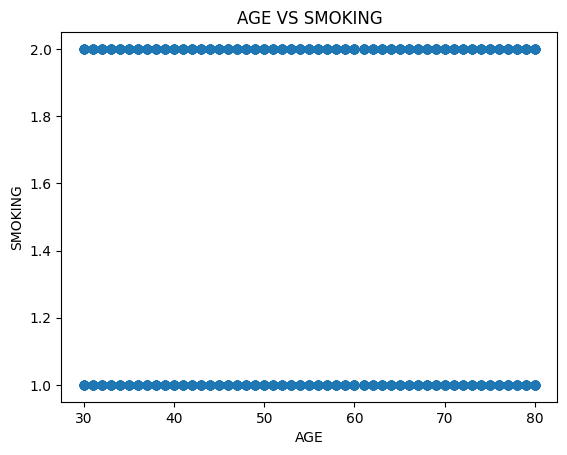

In [ ]:
plt.scatter(data.AGE,data.SMOKING)
plt.xlabel('AGE')
plt.ylabel('SMOKING')
plt.title('AGE VS SMOKING')


plt.show()

In [ ]:
def loss_function(m,b,points):
  total_error=0
  for i in range(len(points)):
    x=points.iloc[i].AGE
    y=points.iloc[i].SMOKING
    total_error+=(y-(m*x+b))**2
    total_error/float(len(points))
    return total_error






this is the basic loss function it tells us how much we r off from our actual result  we r ot going to actually use it cuz what we r interested in is minimizing the error and thats already included in gradient descent gradient

In [ ]:
def gradient_descent(m_now,b_now,points,L):
  m_gradient=0
  b_gradient=0
  n=float(len(points))
  for i in range(n):
    x=points.iloc[i].AGE
    y=points.iloc[i].SMOKING
    m_gradient+=-(2/n)*x*(y-(m_now*x+b_now))
    b_gradient+=-(2/n)*(y-(m_now*x+b_now))
    m=m_now-L*m_gradient
    b=b_now-L*b_gradient
    return m,b




this is the main functional all that we need to do for linear regression basically this is all the mathemtical euquation

Epoch 0: m = 0.016421533333333297, b = 0.00029819999999998936


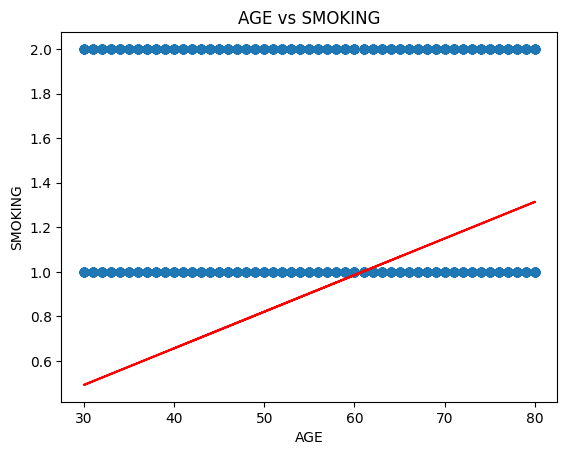

Epoch 100: m = 0.025142433434356664, b = 0.0024765265517901042


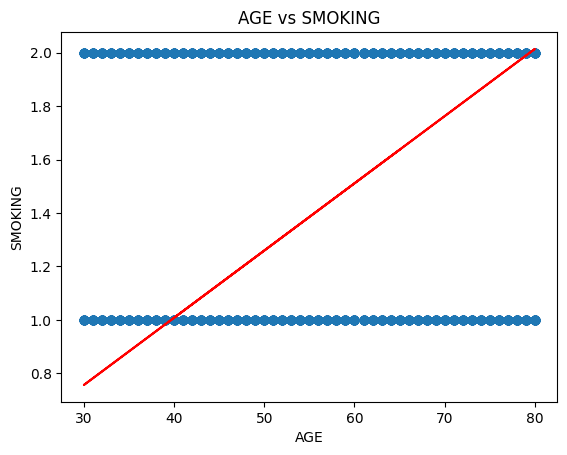

Epoch 200: m = 0.025108125252305505, b = 0.004504003701909837


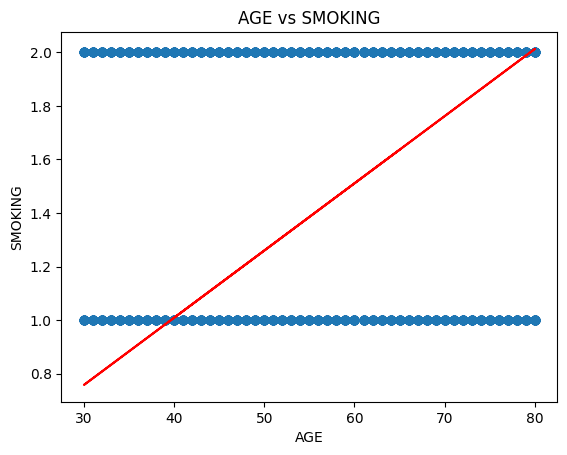

Epoch 300: m = 0.025073862636926885, b = 0.00652878804285514


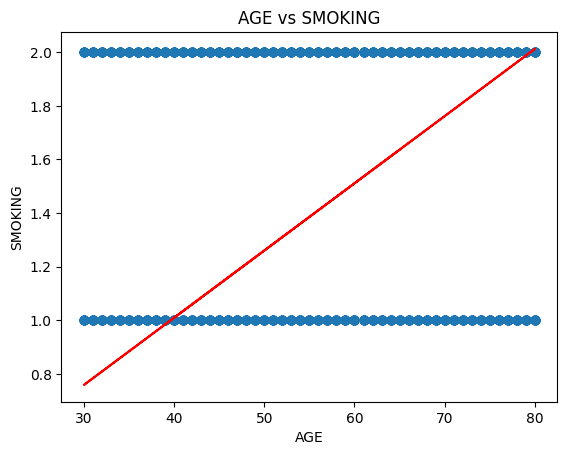

Epoch 400: m = 0.025039645527701087, b = 0.008550883151100967


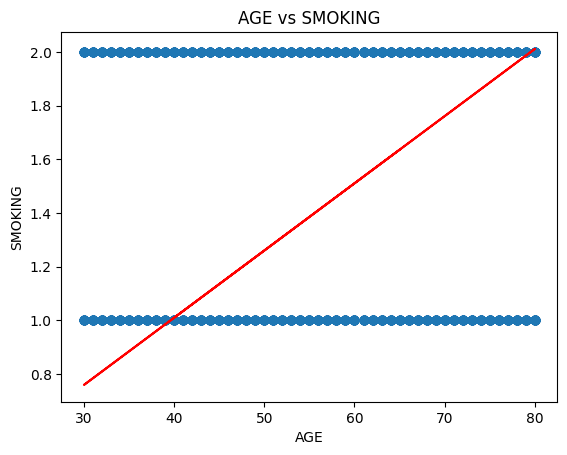

Epoch 500: m = 0.025005473864188766, b = 0.01057029259837216


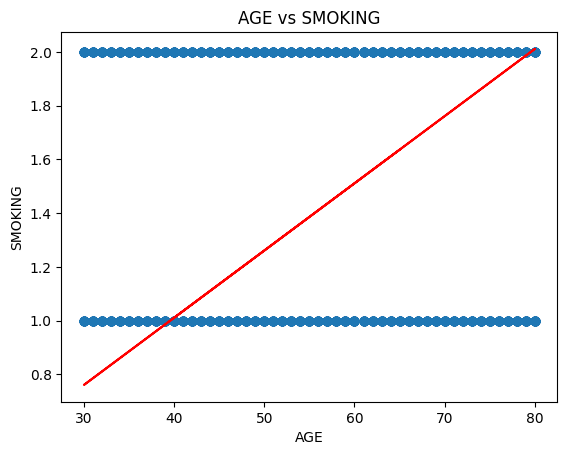

Epoch 600: m = 0.024971347586030854, b = 0.012587019951649719


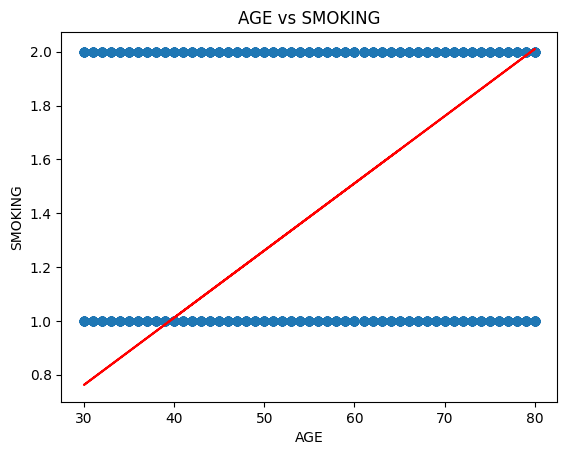

Epoch 700: m = 0.024937266632948447, b = 0.01460106877317716


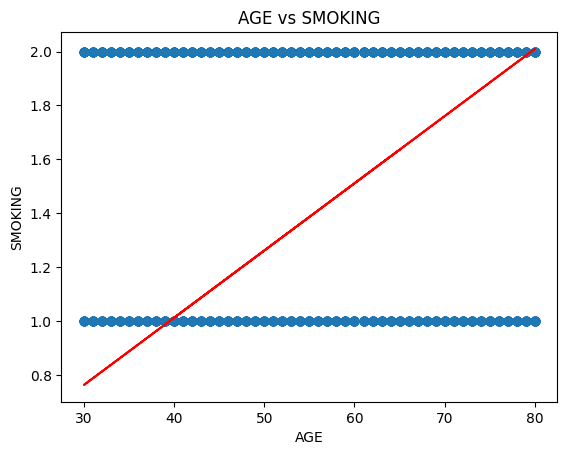

Epoch 800: m = 0.024903230944742696, b = 0.016612442620466752


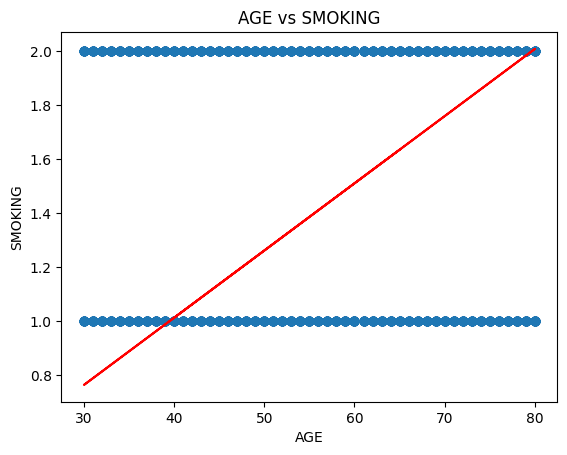

Epoch 900: m = 0.024869240461294722, b = 0.018621145046305878


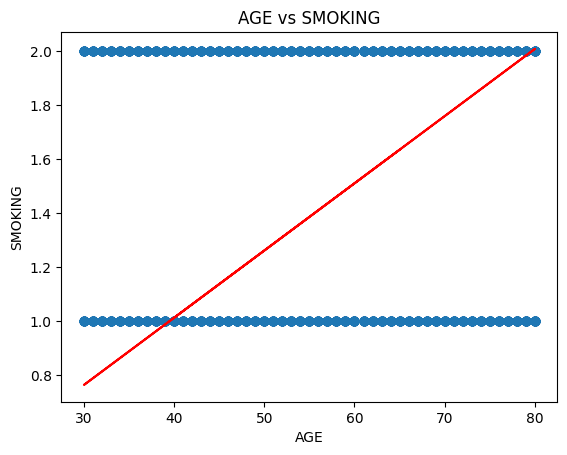

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is a pandas DataFrame with columns 'AGE' and 'SMOKING'
m = 0
b = 0
L = 0.0001
epochs = 1000

# Gradient descent function
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(int(n)):
        x = points.iloc[i].AGE
        y = points.iloc[i].SMOKING
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))
    m_new = m_now - (L * m_gradient)
    b_new = b_now - (L * b_gradient)
    return m_new, b_new

# Perform gradient descent
for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 100 == 0:  # Plot every 100 epochs to reduce the number of plots
        print(f"Epoch {i}: m = {m}, b = {b}")

        plt.scatter(data.AGE, data.SMOKING)
        y_pred = m * data.AGE + b
        plt.plot(data.AGE, y_pred, color='red')
        plt.xlabel('AGE')
        plt.ylabel('SMOKING')
        plt.title('AGE vs SMOKING')
        plt.show()
